In [96]:
def hint(string): return print(''.join(map(chr, map(lambda x: int(x, 16), string.split('.')))))

## Environment
+ Pycharm
+ python3.6
+ networkx
+ jieba
+ numpy, pandas, matplotlib
+ gensim

## References

+ https://nlp.stanford.edu/pubs/see2017get.pdf
+ https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf
+ https://openreview.net/pdf?id=SyK00v5xx
+ https://arxiv.org/abs/1409.0473
+ 

## Background Knowledge

Q1. 简述自动摘要技术的三个应用场景？

回答:

1.新闻提取
    
2.搜索引擎
    
3.汇报文档

##### 提示，如果需要帮助，可以运行以下的提示

In [6]:
# remove the # before hint(), to show the example sulution
# hint('a.641c.7d22.5f15.64ce.ff1b.a.32.2e.20.89c2.70b9.62bd.53d6.ff1b.a.33.2e.20.65b0.95fb.ff1b.a.34.2e.20.6c47.62a5.6587.6863.a')

Q2. 目前的摘要技术分为哪两类？

回答：抽取式（extractive），另一种是生成式（abstractive）。

抽取式是根据词语重要性、句子重要性排序，抽取出重要度高的句子，从而形成摘要。主要是对文本的选择，过程相对更容易，但是对于复杂的文本时，很难仅仅通过选择文本来形成摘要，如小说。

生成式则是通过自然语言处理，输出简洁、流畅、保留关键信息，更像人进行摘要的过程，涉及到生成文本，过程更为复杂。但生成能力更强，可认为有一定的概括能力。


In [8]:
# hint('a.6458.8981.20.41.62.73.74.72.61.63.74.69.76.65.3a.20.91cd.65b0.6574.7406.4fe1.606f.a.62bd.53d6.20.45.78.74.72.61.63.74.69.76.65.3a.20.4ece.539f.6587.4e2d.63d0.53d6.90e8.5206.a')

Q3. 目前实现自动摘要的难点在哪里？列出三点。

In [9]:
hint('a.31.2e.20.7f3a.4e4f.6807.6ce8.8bad.7ec3.6570.636e.ff1b.a.32.2e.20.57fa.4e8e.6587.672c.7406.89e3.ff0c.63d0.53d6.91cd.8981.5185.5bb9.96be.ff1b.a.33.2e.20.4eba.7c7b.5bf9.6587.672c.903b.8f91.654f.611f.ff0c.6458.8981.7ed3.679c.5bb9.9519.7387.4f4e.a')


1. 缺乏标注训练数据；
2. 基于文本理解，提取重要内容难；
3. 人类对文本逻辑敏感，摘要结果容错率低



## Basic Technologies

Q4. 什么是PageRank？ PageRank 用在什么地方？用 $Latex$ 写出其方程

回答： 

PageRank，网页排名，又称网页级别、Google左侧排名或佩奇排名，是一种由根据网页之间相互的超链接计算的技术，而作为网页排名的要素之一，以Google公司创办人拉里·佩奇（Larry Page）之姓来命名。Google用它来体现网页的相关性和重要性，在搜索引擎优化操作中是经常被用来评估网页优化的成效因素之一。Google的创始人拉里·佩奇和谢尔盖·布林于1998年在斯坦福大学发明了这项技术。

方程：
$$ PR(p_i) = \alpha \sum_{p_j \in M_pi}\frac{PR(p_j)}{L(p_j)}+\frac{(1-\alpha)}{N}$$
其中Mpi是所有对pi网页有出链的网页集合，L(pj)是网页pj的出链数目，N是网页总数，α一般取0.85。

In [6]:
# hint('a.31.2e.20.65b9.7a0b.3a.a.20.20.20.20.50.52.28.70.5f.69.29.20.3d.20.a.72.61.63.7b.31.2d.64.7d.7b.4e.7d.20.2b.20.64.20.5c.73.75.6d.5f.7b.70.5f.6a.20.5c.69.6e.20.4d.28.70.5f.69.29.7d.20.a.72.61.63.7b.50.52.20.28.70.5f.6a.29.7d.7b.4c.28.70.5f.6a.29.7d.a.32.2e.20.53c2.8003.ff1a.a.20.20.20.20.68.74.74.70.73.3a.2f.2f.77.77.77.2e.77.69.6b.69.77.61.6e.64.2e.63.6f.6d.2f.65.6e.2f.50.61.67.65.52.61.6e.6b.a')

Q5. PageRank和TextRank的关系是什么，TextRank的背景原理是什么？ 

回答：

原理相同，应用背景不同。

在google的pagerank在citation analysis, social networks, and the analysis of the link-structure of the World Wide Web得到了成功应用，便将这种方法应用到自然语言处理中。

In [8]:
# hint('a.53c2.8003.8bba.6587.ff1a.20.68.74.74.70.73.3a.2f.2f.77.65.62.2e.65.65.63.73.2e.75.6d.69.63.68.2e.65.64.75.2f.7e.6d.69.68.61.6c.63.65.61.2f.70.61.70.65.72.73.2f.6d.69.68.61.6c.63.65.61.2e.65.6d.6e.6c.70.30.34.2e.70.64.66.a')

Q6. 在存在大量原始文本以及该文本对应的摘要内容时，我们是否可以使用 Seq2Seq 进行生成？ Sequence2Sequence的原理是什么？ Attention的机制原理是什么？ 

可以

 Sequence2Sequence的原理：参考https://www.cnblogs.com/DLlearning/p/7834018.html
 
 seq2seq模型是以编码（Encode）和解码（Decode）为代表的架构方式，seq2seq模型是根据输入序列X来生成输出序列Y，在翻译，文本自动摘要和机器人自动问答以及一些回归预测任务上有着广泛的运用。以encode和decode为代表的seq2seq模型，encode意思是将输入序列转化成一个固定长度的向量，decode意思是将输入的固定长度向量解码成输出序列。

<img src='encode_and_decode.png'>

上图为seq2seq的encode和decode结构，采用CNN/LSTM模型。在RNN中，当前时间的隐藏状态是由上一时间的状态和当前时间的输入x共同决定的，即
$$h_t=f(h_{t-1},x_t)$$

[编码阶段]
得到各个隐藏层的输出然后汇总，生成语义向量
$$C = q(h_1,h_2,h_3,...,h_T_x)$$
也可以将最后的一层隐藏层的输出作为语义向量C 
$$C = q(h_1,h_2,h_3,...,h_T_x)=h_T_x$$

[解码阶段]
这个阶段，我们要根据给定的语义向量C和输出序列y1,y2,…yt−1来预测下一个输出的单词yt，即
$$y_t=argmaxP(y_t)=\prod_{t=1}^Tp(y_t|\{y_1,...,y_{t-1}\},C)$$

Attention的机制原理：

encoder部分采用一个单层双向LSTM，输入原文的词向量序列，输出一个编码后的隐层状态序列h_i；

decoder部分采用一个单层单向LSTM，每一步的输入是前一步预测的词的词向量，同时输出一个解码的状态序列s_t,用于当前步的预测。

attention是针对原文的概率分布，目的在于告诉模型在当前步的预测过程中，原文中的哪些词更重要，具体的计算公式为：
$$e^t_i=v^Ttanh(W_hh_i+W_ss_t+b_attn)$$
$$a^t=softmax(e^t)$$


### Extractive, Abstractive 
+ Extractive是从文中找出关键信息，然后拼接进行结果输出
    + 确定重要信息
+ Abstracrtive: 依据文本的输入，生产单词（可能是新的单词）进行结果输出
    + Seq2Seq的问题
    + Transfomer

## Data Pipeline

我们首先加载数据

In [234]:
import pandas as pd
import numpy as np
import jieba
import os

def cut(string): return ' '.join(jieba.cut(string))
path_root = 'D:\data'
news_file = os.path.join(path_root, 'sqlResult_1558435.csv') 
# this file could downloaded from github group's : 
#  https://github.com/Artificial-Intelligence-for-NLP-Chinese/datasource 

In [235]:
news_content = pd.read_csv(news_file, encoding='gb18030')
news_content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


然后进行：
    1. 把content这一列全部拿出来
    2. 对content进行切词
    3. 统计单词出现的频率格式
    4. 其他的分析
`提示`：相关代码可以在Github Group的Slides里边的Lecture18，自动摘要里边看到。 

In [236]:
news_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89611 entries, 0 to 89610
Data columns (total 7 columns):
id         89611 non-null int64
author     79396 non-null object
source     89609 non-null object
content    87054 non-null object
feature    89611 non-null object
title      89577 non-null object
url        87144 non-null object
dtypes: int64(1), object(6)
memory usage: 4.8+ MB


In [237]:
news_content.dropna(subset=['content'], inplace=True)

In [238]:
news_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87054 entries, 0 to 89610
Data columns (total 7 columns):
id         87054 non-null int64
author     76925 non-null object
source     87052 non-null object
content    87054 non-null object
feature    87054 non-null object
title      87054 non-null object
url        87054 non-null object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [239]:
news_content.drop_duplicates(subset=['content'], inplace=True)

In [240]:
news_content.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74917 entries, 0 to 89610
Data columns (total 7 columns):
id         74917 non-null int64
author     65165 non-null object
source     74915 non-null object
content    74917 non-null object
feature    74917 non-null object
title      74917 non-null object
url        74917 non-null object
dtypes: int64(1), object(6)
memory usage: 4.6+ MB


In [241]:
import re
def token(string):return re.findall(r'[\d|\w]+', string)

In [242]:
token('这是一个测试78432\n\n\n')

['这是一个测试78432']

In [243]:
news_content['content'][0]

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [244]:
news_content_cut = [token(n) for n in news_content['content']]

In [245]:
news_content_cut = [''.join(n) for n in news_content_cut]

In [246]:
news_content_cut = [cut(n) for n in news_content_cut]

In [247]:
news_content_cut[0]

'此外 自 本周 6 月 12 日起 除 小米 手机 6 等 15 款 机型 外 其余 机型 已 暂停 更新 发布 含 开发 版 体验版 内测 稳定版 暂不受 影响 以 确保 工程师 可以 集中 全部 精力 进行 系统优化 工作 有人 猜测 这 也 是 将 精力 主要 用到 MIUI9 的 研发 之中 MIUI8 去年 5 月 发布 距今已有 一年 有余 也 是 时候 更新换代 了 当然 关于 MIUI9 的 确切 信息 我们 还是 等待 官方消息'

In [248]:
news_content_cut[0].split()

['此外',
 '自',
 '本周',
 '6',
 '月',
 '12',
 '日起',
 '除',
 '小米',
 '手机',
 '6',
 '等',
 '15',
 '款',
 '机型',
 '外',
 '其余',
 '机型',
 '已',
 '暂停',
 '更新',
 '发布',
 '含',
 '开发',
 '版',
 '体验版',
 '内测',
 '稳定版',
 '暂不受',
 '影响',
 '以',
 '确保',
 '工程师',
 '可以',
 '集中',
 '全部',
 '精力',
 '进行',
 '系统优化',
 '工作',
 '有人',
 '猜测',
 '这',
 '也',
 '是',
 '将',
 '精力',
 '主要',
 '用到',
 'MIUI9',
 '的',
 '研发',
 '之中',
 'MIUI8',
 '去年',
 '5',
 '月',
 '发布',
 '距今已有',
 '一年',
 '有余',
 '也',
 '是',
 '时候',
 '更新换代',
 '了',
 '当然',
 '关于',
 'MIUI9',
 '的',
 '确切',
 '信息',
 '我们',
 '还是',
 '等待',
 '官方消息']

In [249]:
from collections import Counter

In [250]:
words = []
for document in news_content_cut:
    words += [w for w in document.split()]

In [251]:
len(words)

16723472

In [252]:
words_counter = Counter(words)

In [253]:
words_counter

Counter({'此外': 4205,
         '自': 4558,
         '本周': 475,
         '6': 26457,
         '月': 164361,
         '12': 8596,
         '日起': 1330,
         '除': 1244,
         '小米': 285,
         '手机': 2959,
         '等': 56372,
         '15': 7303,
         '款': 580,
         '机型': 138,
         '外': 2969,
         '其余': 469,
         '已': 20311,
         '暂停': 830,
         '更新': 597,
         '发布': 7527,
         '含': 639,
         '开发': 3815,
         '版': 845,
         '体验版': 1,
         '内测': 6,
         '稳定版': 1,
         '暂不受': 1,
         '影响': 7970,
         '以': 35510,
         '确保': 2814,
         '工程师': 519,
         '可以': 13077,
         '集中': 2831,
         '全部': 3673,
         '精力': 259,
         '进行': 24628,
         '系统优化': 1,
         '工作': 20207,
         '有人': 1819,
         '猜测': 206,
         '这': 23719,
         '也': 46628,
         '是': 98024,
         '将': 59408,
         '主要': 9519,
         '用到': 41,
         'MIUI9': 2,
         '的': 679465,
         '研发': 3

In [254]:
sorted(words_counter, key=lambda x:words_counter[x], reverse=True)

['的',
 'n',
 '在',
 '月',
 '日',
 '和',
 '了',
 '新华社',
 '年',
 '是',
 '１',
 '０',
 '２',
 '中',
 '中国',
 '外代',
 '记者',
 '将',
 '2017',
 '与',
 '等',
 '为',
 '二线',
 '对',
 '5',
 '也',
 '有',
 '4',
 '上',
 '照片',
 '５',
 '说',
 '他',
 '３',
 '发展',
 '以',
 '４',
 '国际',
 'nn',
 '６',
 '到',
 '比赛',
 '人',
 '从',
 '不',
 '都',
 '后',
 '6',
 '就',
 '７',
 '并',
 '企业',
 '国家',
 '体育',
 '被',
 '进行',
 '北京',
 '当日',
 '美国',
 '这',
 '3',
 '但',
 '新',
 '个',
 '举行',
 '1',
 '足球',
 '2',
 '表示',
 '９',
 '比',
 '我',
 '经济',
 '还',
 '合作',
 '一个',
 '要',
 '８',
 '已',
 '工作',
 '我们',
 '摄',
 '一路',
 '市场',
 '一带',
 '日电',
 '让',
 '建设',
 '通过',
 '多',
 '完',
 '时',
 '问题',
 '更',
 '而',
 '公司',
 '会',
 '项目',
 '于',
 '下',
 '选手',
 'n5',
 '目前',
 'n4',
 '大',
 '世界',
 '联赛',
 '向',
 '成为',
 '活动',
 '球员',
 '服务',
 '队',
 '没有',
 '社会',
 '全国',
 '重要',
 '自己',
 '着',
 '他们',
 '今年',
 '晋级',
 '文化',
 '可以',
 '第',
 '她',
 '前',
 '及',
 '由',
 '地',
 '创新',
 '已经',
 '10',
 '技术',
 '城市',
 '能',
 '提供',
 '把',
 '认为',
 '一',
 '投资',
 '好',
 '相关',
 '实现',
 '其',
 '战胜',
 '总统',
 '政府',
 '决赛',
 '研究',
 '至',
 '时间',
 '开始',
 '胜',
 

In [256]:
words_counter_sorted = sorted(words_counter.items(), key=lambda x:x[1], reverse=True)

In [257]:
words_counter_sorted

[('的', 679465),
 ('n', 344982),
 ('在', 244434),
 ('月', 164361),
 ('日', 141539),
 ('和', 130548),
 ('了', 119693),
 ('新华社', 118064),
 ('年', 109714),
 ('是', 98024),
 ('１', 87881),
 ('０', 84479),
 ('２', 70195),
 ('中', 70096),
 ('中国', 69791),
 ('外代', 65295),
 ('记者', 59929),
 ('将', 59408),
 ('2017', 56892),
 ('与', 56517),
 ('等', 56372),
 ('为', 55252),
 ('二线', 53012),
 ('对', 49427),
 ('5', 46984),
 ('也', 46628),
 ('有', 44918),
 ('4', 44343),
 ('上', 43981),
 ('照片', 40900),
 ('５', 40772),
 ('说', 38715),
 ('他', 36772),
 ('３', 36750),
 ('发展', 36697),
 ('以', 35510),
 ('４', 34557),
 ('国际', 34428),
 ('nn', 34070),
 ('６', 30489),
 ('到', 29562),
 ('比赛', 29548),
 ('人', 28978),
 ('从', 28631),
 ('不', 27595),
 ('都', 27472),
 ('后', 26665),
 ('6', 26457),
 ('就', 26339),
 ('７', 26231),
 ('并', 26031),
 ('企业', 25813),
 ('国家', 25800),
 ('体育', 24816),
 ('被', 24733),
 ('进行', 24628),
 ('北京', 24172),
 ('当日', 24048),
 ('美国', 24026),
 ('这', 23719),
 ('3', 23443),
 ('但', 23116),
 ('新', 22839),
 ('个', 22481),
 ('举行', 22

In [258]:
frequence = {w:count/len(words) for w, count in words_counter.items()}

In [260]:
occrrences_frequences = sorted(list(frequence.values()),reverse=True)

In [261]:
X = range(len(occrrences_frequences))

In [262]:
import matplotlib.pyplot as plt

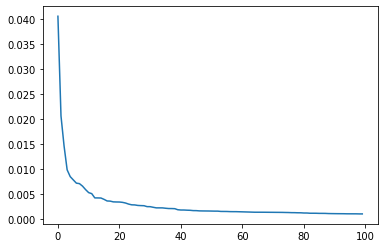

In [263]:
plt.plot(X[:100], occrrences_frequences[:100])

## 使用TextRank进行自动摘要提取

#### Task 1 使用neteworkx包，建立一个随机图，对该图进行PageRank分析


In [1]:
#hints: 代码可以在Github Group 中看到
import networkx as nx
G = nx.Graph()
G.add_edges_from([(0, 1), (1, 2)])

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


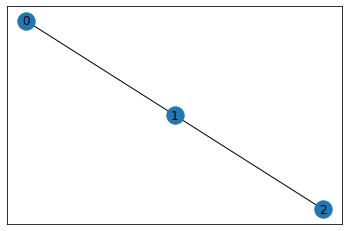

In [168]:
nx.draw_networkx(G)

In [175]:
e = zip(range(2, 4), range(4, 6))
G.add_edges_from(e)

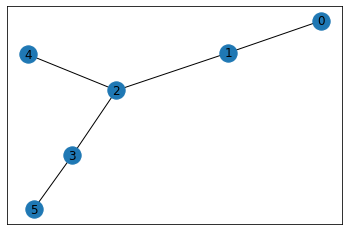

In [176]:
nx.draw_networkx(G)

In [190]:
G.add_edges_from([(3,5)], weight=10)

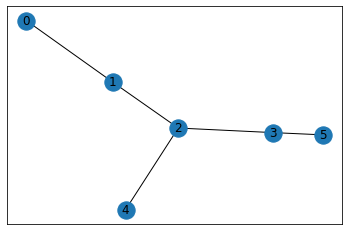

In [191]:
nx.draw_networkx(G)

In [192]:
ranking_result = nx.pagerank(G)

In [193]:
sorted(ranking_result.items(), key=lambda x:x[1],reverse=True)

[(3, 0.29014528233310277),
 (2, 0.22686231950895105),
 (5, 0.21470976488215102),
 (1, 0.15730704240235),
 (0, 0.05842791560889785),
 (4, 0.05254767526454705)]

#### Task 2 使用PageRank 对文本进行关联分析

#### 1.textrank找关键词

In [46]:
#hints: 代码可以在Github Group 中看到
def get_connect_graph_by_text_rank(tokenized_text: str, window=2):
    keywords_graph = nx.Graph()
    tokeners = tokenized_text.split()
    for ii, t in enumerate(tokeners):
        word_tuples = [(tokeners[connect], t) 
                       for connect in range(ii-window, ii+window+1) 
                       if connect >= 0 and connect < len(tokeners)]
        keywords_graph.add_edges_from(word_tuples)

    return keywords_graph

In [47]:
keywords_graph = get_connect_graph_by_text_rank(news_content_cut[0])

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


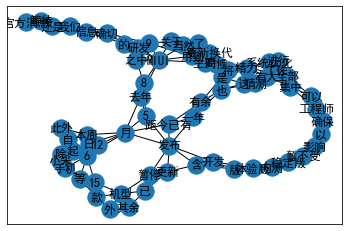

In [48]:
nx.draw_networkx(keywords_graph, note_size=10)

In [49]:
keywords_rank = nx.pagerank(keywords_graph)

In [50]:
sorted(keywords_rank.items(), key=lambda x:x[1],reverse=True)

[('MIUI', 0.025866698785978005),
 ('6', 0.023083153793145017),
 ('发布', 0.02224554400184492),
 ('月', 0.022144575797209506),
 ('精力', 0.02200551338492073),
 ('也', 0.01963878787264618),
 ('是', 0.019475357335891917),
 ('机型', 0.01897095279746639),
 ('的', 0.017473191716918336),
 ('9', 0.017228484482222913),
 ('还是', 0.015591313382353887),
 ('我们', 0.014898245545728403),
 ('暂不受', 0.014343662348924901),
 ('影响', 0.014341545989082223),
 ('本周', 0.014337764608744183),
 ('稳定版', 0.014317845230635128),
 ('以', 0.014311011807750754),
 ('内测', 0.014266580006963545),
 ('确保', 0.014253911032555175),
 ('信息', 0.01421986533074685),
 ('体验版', 0.014159734731361916),
 ('工程师', 0.014138419460112484),
 ('款', 0.014079791527858895),
 ('版', 0.0140408632261911),
 ('已', 0.014016499720016142),
 ('可以', 0.014008349790283568),
 ('除', 0.013819219556689827),
 ('起', 0.013760590379656105),
 ('等', 0.01374618743059326),
 ('15', 0.013721160678866293),
 ('开发', 0.013716282236561718),
 ('小米', 0.013700511661152987),
 ('手机', 0.0136981757115

#### 2.textrank摘要

In [57]:
# 加载停用词
stop_words = []
for line in open(r'D:\Github_project\common-data\停用词.txt', 'r', encoding='utf-8'):
    stop_words.append(line.replace('\n', ''))

In [58]:
stop_words

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.数',
 '.日',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '\u3000',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '【',
 '】',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一.',
 '一一',
 '一下',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一则通过',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一时',
 '一来',
 '一样',
 '一次',
 '一片',
 '一番',
 '一直',
 '一致',
 '一般',
 '一起',


In [100]:
import networkx as nx

In [101]:
def split_sentence(original_text):
    original_text = original_text.replace('\r\n', '')
    sentences = re.split('([。?!！？.])', original_text) # split sentence
    new_sents = []
    for i in range(len(sentences) // 2):
        sent = sentences[2*i] + sentences[2*i+1]
        new_sents.append(sent)
    return new_sents

In [102]:
split_sentence('此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n')

['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。',
 '有人猜测这也是将精力主要用到MIUI 9的研发之中。',
 'MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。',
 '当然，关于MIUI 9的确切信息，我们还是等待官方消息。']

In [103]:
import math

In [104]:
def get_connect_graph_by_weight_text_rank(original_text):
    sentences_graph = nx.Graph()
    sentences = split_sentence(original_text)
    sentences_cut = [cut(''.join(token(n))) for n in sentences]
    sentences_cut_del_stopwords = []
    
    for s in sentences_cut:
        words = s.split()
        sentence_cut_del_stopwords = list(set(words) - set(stop_words))
        if sentence_cut_del_stopwords != []:
            sentences_cut_del_stopwords.append(sentence_cut_del_stopwords)
    
    for i, sentence in enumerate(sentences_cut_del_stopwords):
        for connect_id in range(i+1, len(sentences_cut_del_stopwords)):
            # 求两个句子的相似度，也就是连接权重
            length_same_words = len(set(sentence).intersection(set(sentences_cut_del_stopwords[connect_id])))
            similiar = length_same_words / (math.log(len(sentence)) + math.log(len(sentences_cut_del_stopwords[connect_id])))
            sentences_graph.add_edges_from([(i,connect_id)], weight=similiar)
            
    return sentences, sentences_graph

In [105]:
sentences, sentences_graph = get_connect_graph_by_weight_text_rank('（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的事，你也会这样的”，期间她还不时试图挣脱刘青的手要冲向护栏往下跳。\r\n就这样，我被牵着走了大概十多分钟，天突然下起了大暴雨，雨大的连眼睛都睁不开”刘青继续说着，瞬间他们就被雨透了，但女子依然不愿意接受刘青的帮助，就继续冒着大雨往前走。\r\n大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。从南平快速下来后，刘青和巡防员将女子带到了附近的坂田派出所。\r\n那姑娘到底是遭遇了什么样的事情\r\n才会说\r\n“要是你也遭遇我的事，你也会这样”\r\n据警方透露，该女子姓陈，系湖北人，今年44岁，据家属反映其有精神病史。三天前，陈某从老家来深圳约会网友，但约会受挫导致情绪异常，女子遂产生轻生念头。\r\n目前\r\n陈某已经被送往深圳某精神病医院进行治疗\r\n大大君只希望姑娘能早点康复\r\n其实真爱的到来并不存在年龄的限制\r\n你们说呢？\r\n因善良的原因\r\n一众网友纷纷为\r\n交警暖男点ZAN\r\n@弓常yan桦：就想问这个小哥哥有女票吗\r\n@原谅我这一辈子浪荡不羁爱萨摩耶：有什么过不去的要轻生嘛？ 想想自己的家人。同时也感谢交警蜀黍\r\n@火心聆听心灵：点赞交警\r\n@中華云盾：警察……警察就是群众最需时申出援手\r\n@Tomchlee：蜀黍帅！\r\n@SJ-李赫海i：这个交警很暖有木有！\r\n男子迷奸网友拍418个视频 女方从20岁到50岁不等\r\n去年6月7号上午，淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话，一名女子言语不清，声称自己遭到了侵害。女子、被侵害、言语不清，几个关键词令接到电话的民警瞬间紧张起来。\r\n')

In [106]:
sentences

['（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。',
 '那么事发时到底都发生了些什么呢？',
 '南都记者带您一起还原现场南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。',
 '刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。',
 '女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。',
 '刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。',
 '此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。',
 '现场还原从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。',
 '当时正值上班高峰期，十字路口的车流已经排起了长队。',
 '当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。',
 '当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。',
 '记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。',
 '一大清早路上看到这样的情况恐怕大家都没办法淡定面对这一情况刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。',
 '碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。',
 '刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要

In [107]:
%matplotlib inline

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


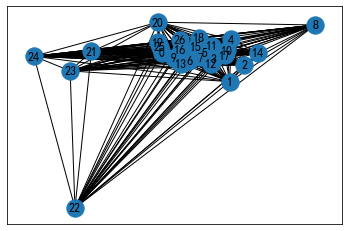

In [108]:
nx.draw_networkx(sentences_graph)

In [135]:
def sentences_ranking(original_text):
    sentences, sentences_graph = get_connect_graph_by_weight_text_rank(original_text)
    ranking_sentences_id = nx.pagerank(sentences_graph)
    ranking_sentences_id = sorted(ranking_sentences_id.items(), key=lambda x: x[1], reverse=True)
#     ranking_sentences = []
    
#     for i in range(len(ranking_sentences_id)):
#         ranking_sentences.append(sentences[int(ranking_sentences_id[i][0])])
        
    return ranking_sentences_id, sentences

In [136]:
sentences_ranking('（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的事，你也会这样的”，期间她还不时试图挣脱刘青的手要冲向护栏往下跳。\r\n就这样，我被牵着走了大概十多分钟，天突然下起了大暴雨，雨大的连眼睛都睁不开”刘青继续说着，瞬间他们就被雨透了，但女子依然不愿意接受刘青的帮助，就继续冒着大雨往前走。\r\n大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。从南平快速下来后，刘青和巡防员将女子带到了附近的坂田派出所。\r\n那姑娘到底是遭遇了什么样的事情\r\n才会说\r\n“要是你也遭遇我的事，你也会这样”\r\n据警方透露，该女子姓陈，系湖北人，今年44岁，据家属反映其有精神病史。三天前，陈某从老家来深圳约会网友，但约会受挫导致情绪异常，女子遂产生轻生念头。\r\n目前\r\n陈某已经被送往深圳某精神病医院进行治疗\r\n大大君只希望姑娘能早点康复\r\n其实真爱的到来并不存在年龄的限制\r\n你们说呢？\r\n因善良的原因\r\n一众网友纷纷为\r\n交警暖男点ZAN\r\n@弓常yan桦：就想问这个小哥哥有女票吗\r\n@原谅我这一辈子浪荡不羁爱萨摩耶：有什么过不去的要轻生嘛？ 想想自己的家人。同时也感谢交警蜀黍\r\n@火心聆听心灵：点赞交警\r\n@中華云盾：警察……警察就是群众最需时申出援手\r\n@Tomchlee：蜀黍帅！\r\n@SJ-李赫海i：这个交警很暖有木有！\r\n男子迷奸网友拍418个视频 女方从20岁到50岁不等\r\n去年6月7号上午，淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话，一名女子言语不清，声称自己遭到了侵害。女子、被侵害、言语不清，几个关键词令接到电话的民警瞬间紧张起来。\r\n')

([(5, 0.06583532380026107),
  (3, 0.06502432536358185),
  (0, 0.06133900708394099),
  (7, 0.059797162369581006),
  (10, 0.05547258215516238),
  (16, 0.05051795256329764),
  (15, 0.04922113780916623),
  (17, 0.04828075249978382),
  (12, 0.048118467815197644),
  (6, 0.047914297058710115),
  (9, 0.04619850016905644),
  (11, 0.04086196715180963),
  (13, 0.04055148767797712),
  (19, 0.04036957488255368),
  (25, 0.03903837148294741),
  (18, 0.0370862277520511),
  (26, 0.0333527720827939),
  (4, 0.02982294625076842),
  (2, 0.027828372465515568),
  (21, 0.022670044574275967),
  (14, 0.02054364099839322),
  (20, 0.015095420337511854),
  (24, 0.014494172736130122),
  (23, 0.013113350388661474),
  (1, 0.012899062551864593),
  (8, 0.008816942311702249),
  (22, 0.0057361376673040155)],
 ['（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。',
  '那么事发时到底都发生了些什么呢？',
  '南都记者带您一起还原现场南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。',
  '刘青介绍，6月16日早上7时36分

In [137]:
sentences_ranking('虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？\r\n近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。\r\n当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。\r\n考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。\r\n在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”\r\n')

([(9, 0.10574887332626459),
  (10, 0.10241834615815916),
  (7, 0.0997448694959665),
  (1, 0.09098815043277847),
  (4, 0.08296445341434476),
  (5, 0.0795774556689703),
  (6, 0.07934176038664886),
  (2, 0.07705662089732013),
  (0, 0.07006103267292665),
  (12, 0.06049185021221141),
  (11, 0.05917961855909256),
  (3, 0.05707372795316594),
  (8, 0.035353240822150696)],
 ['虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。',
  '那么，第一款夏普手机什么时候登陆中国呢？',
  '又会是怎么样的手机呢？',
  '近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。',
  '从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。',
  '骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。',
  '当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。',
  '骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。',
  '不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。',
  '考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。',
  '按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机

In [138]:
sentences_ranking('此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n')

([(0, 0.31963224480166985),
  (1, 0.28291168321652993),
  (2, 0.2170883167834702),
  (3, 0.18036775519833015)],
 ['此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。',
  '有人猜测这也是将精力主要用到MIUI 9的研发之中。',
  'MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。',
  '当然，关于MIUI 9的确切信息，我们还是等待官方消息。'])

In [151]:
def get_summarization(original_text, summary_ratio=4):
    #  summary_ratio为原文与摘要的比例
    ranking_sentences_id, sentences = sentences_ranking(original_text)
    candidate_sentences = [s[0] for s in ranking_sentences_id[:len(sentences)//summary_ratio]]
    candidate_sentences = sorted(candidate_sentences)
    
    # 默认第一句话入选
    if 0 in candidate_sentences:
        return ''.join([sentences[id] for id in candidate_sentences])
    else:
        return ''.join([sentences[0]] + [sentences[id] for id in candidate_sentences])

In [152]:
get_summarization('此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n')

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。'

In [153]:
get_summarization('虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？\r\n近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。\r\n当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。\r\n考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。\r\n在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”\r\n')

'虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。'

In [154]:
get_summarization('（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的事，你也会这样的”，期间她还不时试图挣脱刘青的手要冲向护栏往下跳。\r\n就这样，我被牵着走了大概十多分钟，天突然下起了大暴雨，雨大的连眼睛都睁不开”刘青继续说着，瞬间他们就被雨透了，但女子依然不愿意接受刘青的帮助，就继续冒着大雨往前走。\r\n大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。从南平快速下来后，刘青和巡防员将女子带到了附近的坂田派出所。\r\n那姑娘到底是遭遇了什么样的事情\r\n才会说\r\n“要是你也遭遇我的事，你也会这样”\r\n据警方透露，该女子姓陈，系湖北人，今年44岁，据家属反映其有精神病史。三天前，陈某从老家来深圳约会网友，但约会受挫导致情绪异常，女子遂产生轻生念头。\r\n目前\r\n陈某已经被送往深圳某精神病医院进行治疗\r\n大大君只希望姑娘能早点康复\r\n其实真爱的到来并不存在年龄的限制\r\n你们说呢？\r\n因善良的原因\r\n一众网友纷纷为\r\n交警暖男点ZAN\r\n@弓常yan桦：就想问这个小哥哥有女票吗\r\n@原谅我这一辈子浪荡不羁爱萨摩耶：有什么过不去的要轻生嘛？ 想想自己的家人。同时也感谢交警蜀黍\r\n@火心聆听心灵：点赞交警\r\n@中華云盾：警察……警察就是群众最需时申出援手\r\n@Tomchlee：蜀黍帅！\r\n@SJ-李赫海i：这个交警很暖有木有！\r\n男子迷奸网友拍418个视频 女方从20岁到50岁不等\r\n去年6月7号上午，淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话，一名女子言语不清，声称自己遭到了侵害。女子、被侵害、言语不清，几个关键词令接到电话的民警瞬间紧张起来。\r\n')

'（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。现场还原从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。'

In [157]:
get_summarization('网易娱乐7月21日报道林肯公园主唱查斯特·贝宁顿 Chester Bennington于今天早上,在洛杉矶帕洛斯弗迪斯的一个私人庄园自缢身亡,年仅41岁。此消息已得到洛杉矶警方证实。洛杉矶警方透露, Chester的家人正在外地度假, Chester独自在家,上吊地点是家里的二楼。一说是一名音乐公司工作人员来家里找他时发现了尸体,也有人称是佣人最早发现其死亡。林肯公园另一位主唱麦克信田确认了 Chester Bennington自杀属实,并对此感到震惊和心痛,称稍后官方会发布声明。Chester昨天还在推特上转发了一条关于曼哈顿垃圾山的新闻。粉丝们纷纷在该推文下留言,不相信 Chester已经走了。外媒猜测,Chester选择在7月20日自杀的原因跟他极其要好的朋友Soundgarden(声音花园)乐队以及AudioslaveChris乐队主唱 Cornell有关,因为7月20日是 Chris CornellChris的诞辰。而 Cornell于今年5月17日上吊自杀,享年52岁。 Chris去世后, Chester还为他写下悼文。对于 Chester的自杀,亲友表示震惊但不意外,因为 Chester曾经透露过想自杀的念头,他曾表示自己童年时被虐待,导致他医生无法走出阴影,也导致他长期酗酒和嗑药来疗伤。目前,洛杉矶警方仍在调查Chester的死因。据悉, Chester与毒品和酒精斗争多年,年幼时期曾被成年男子性侵,导致常有轻生念头。 Chester生前有过2段婚姻,育有6个孩子。林肯公园在今年五月发行了新专辑《多一丝曙光OneMoreLight》,成为他们第五张登顶ilboard排行榜的专辑。而昨晚刚刚发布新单《 Talking To Myself》MV')

'网易娱乐7月21日报道林肯公园主唱查斯特·贝宁顿 Chester Bennington于今天早上,在洛杉矶帕洛斯弗迪斯的一个私人庄园自缢身亡,年仅41岁。洛杉矶警方透露, Chester的家人正在外地度假, Chester独自在家,上吊地点是家里的二楼。外媒猜测,Chester选择在7月20日自杀的原因跟他极其要好的朋友Soundgarden(声音花园)乐队以及AudioslaveChris乐队主唱 Cornell有关,因为7月20日是 Chris CornellChris的诞辰。目前,洛杉矶警方仍在调查Chester的死因。'

Q6. 切句子是如何实现的？如何使用正则表达式进行句子分割？ 

回答：

In [118]:
# hint('a.70.61.74.74.65.72.6e.20.3d.20.72.65.2e.63.6f.6d.70.69.6c.65.28.27.5b.3002.ff0c.2c.2e.5d.ff1a.27.29.a.73.70.6c.69.74.20.3d.20.70.61.74.74.65.72.6e.2e.73.75.62.28.27.20.27.2c.20.73.65.6e.74.65.6e.63.65.29.2e.73.70.6c.69.74.28.29.20.20.23.20.73.70.6c.69.74.20.73.65.6e.74.65.6e.63.65.a')

Q7. 如果对切词之后的句子的标点符号进行恢复？

回答：

In [231]:
# hint('a.63d0.793a.ff1a.5efa.7acb.53e5.5b50.548c.6807.70b9.7b26.53f7.4e4b.95f4.7684.5173.7cfb.ff0c.4f8b.5982.ff0c.5efa.7acb.4e00.4e2a.5b57.5178.a')

#### Task3 在Pycharm里边合并代码，合并成一个单独的函数，实现输入一篇文章，输出该文本的摘要流程

`Jupyter Notebook`里边适合做中间结果的记录以及想法验证，真正开发还是要在Pycharm等集成IDE里边进行

## 使用词向量进行自动摘要

Q8. 使用词向量进行自动摘要的基本假设是什么？ 

回答:

In [119]:
hint('a.53e5.5b50.5411.91cf.80fd.591f.8861.91cf.53e5.5b50.4e4b.95f4.7684.76f8.4f3c.5ea6.ff0c.6545.800c.53ef.4ee5.901a.8fc7.8be5.65b9.6cd5.5224.65ad.67d0.4e2a.53e5.5b50.662f.5426.548c.6587.672c.542b.4e49.76f8.5173.a')


句子向量能够衡量句子之间的相似度，故而可以通过该方法判断某个句子是否和文本含义相关



#### Task4. 使用普林斯顿2017年的sentence embedding方法，进行句子embedding的构建

Q9. 该句子embedding的原理是什么，有什么优势？ 

回答：

作者将该算法称之为WR。
W表示Weighted，意为使用预估计的参数给句中的每个词向量赋予权重。
R表示Removal，意为使用PCA或者SVD方法移除句向量中的无关部分。

优势：简单，快速，效果好

In [121]:
hint('a.63d0.793a.ff1a.9891.7387.ff0c.91cd.8981.6027.ff0c.5feb.901f.ff0c.6027.80fd.597d.a')


提示：频率，重要性，快速，性能好



Q10. embedding是什么？ 用数学的方式解释embedding。

回答：将源数据映射到另外一个空间

In [122]:
hint('a.63d0.793a.ff1a.5047.8bbe.4e24.4e2a.65.6e.74.69.74.79.4fdd.6301.5177.6709.67d0.79cd.201c.504f.5e8f.201d.7279.6027.ff0c.5373.ff0c.53ef.4ee5.6bd4.8f83.ff0c.90a3.4e48.ff0c.5c06.8fd9.4e24.4e2a.20.65.6e.74.69.74.79.20.6295.5f71.5230.53e6.5916.7684.7a7a.95f4.4e2d.ff0c.5728.8be5.7a7a.95f4.4e2d.ff0c.8fd9.79cd.201c.504f.5e8f.201d.4f9d.7136.80fd.591f.4fdd.6301.a')


提示：假设两个entity保持具有某种“偏序”特性，即，可以比较，那么，将这两个 entity 投影到另外的空间中，在该空间中，这种“偏序”依然能够保持



Q11. 除了word embedding， sentence embedding， embedding还可以应用到哪些场景？

回答：image embedding, paper embedding， web page embedding

In [123]:
hint('a.4f8b.5982.793e.4ea4.7f51.7edc.91cc.8fb9.4eba.5458.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.597d.53cb.63a8.8350.ff09.ff0c.20.8d2d.7269.7f51.7ad9.5546.54c1.7684.65.6d.62.65.64.64.69.6e.67.ff08.8fdb.884c.5546.54c1.63a8.8350.ff09.a.53e6.5916.ff0c.53ef.4ee5.601d.8003.4e00.4e0b.57fa.4e8e.8fd9.79cd.65.6d.62.65.64.64.69.6e.67.7684.63a8.8350.7684.4f18.70b9.5728.54ea.91cc.ff1f.20.a')


例如社交网络里边人员的embedding（进行好友推荐）， 购物网站商品的embedding（进行商品推荐）
另外，可以思考一下基于这种embedding的推荐的优点在哪里？ 



便于利用特征计算相似度

Q12. 这种embedding的方法和tfidf有何异同？ 

回答：

In [124]:
hint('a.63d0.793a.ff1a.74.66.69.64.66.8003.8651.7684.9891.7387.5176.20.74.66.20.548c.20.69.64.66.20.5206.522b.662f.4ec0.4e48.ff1f.20.8be5.65.6d.62.65.64.64.69.6e.67.7684.9891.7387.7c7b.4f3c.4e8e.4ec0.4e48.ff1f.20.a')


提示：tfidf考虑的频率其 tf 和 idf 分别是什么？ 该embedding的频率类似于什么？ 



词频 (term frequency, TF) 、逆向文件频率 (inverse document frequency, IDF)
$$TF_w=\frac{在某一类词条w出现的次数}{该类中所有的词条数目}$$
$$IDF_w=log(\frac{语料库的文档总数}{包含词条w的文档数+1}$$
$$TF-IDF=TF*IDF$$

Q13. 构建句子想了的过程中，面对未知的单词，如果解决？

回答:可以略过

In [125]:
hint('a.5f00.53d1.578b.95ee.9898.ff0c.53ef.4ee5.7701.7565.ff0c.53ef.4ee5.8d4b.4e88.968f.673a.503c.ff0c.53ef.4ee5.7ed9.4e00.7279.5b9a.503c.ff0c.5177.4f53.60c5.51b5.9700.8981.7ecf.8fc7.8bd5.9a8c.8fdb.884c.5206.6790.a')


开发型问题，可以省略，可以赋予随机值，可以给一特定值，具体情况需要经过试验进行分析



Q14. 构建完成句子向量之后，句子相似度如何判断？ 

回答：cos

In [127]:
hint('a.63.6f.73.69.6e.65.ff0c.20.4f59.5f26.8ddd.79bb.a')


cosine， 余弦距离



Q15. 为什么要用cosine距离进行判断，为何不用欧几里得？ 

回答：

In [128]:
hint('a.63d0.793a.ff1a.8bf7.53c2.8003.77.6f.72.64.32.76.65.63.8bad.7ec3.65f6.5019.7684.7684.6982.7387.5206.5e03.7684.5b9a.4e49.ff0c.53ef.4ee5.770b.5230.5176.6c.6f.73.73.5f53.65f6.4f18.5316.7684.5c31.662f.20.65.78.70.28.76.31.20.2e.20.76.32.29.2c.20.90a3.4e48.5f53.20.76.31.20.2e.20.76.32.6700.5927.7684.65f6.5019.ff0c.a.5c31.662f.8fd9.4e24.4e2a.5411.91cf.65b9.5411.4e00.81f4.7684.65f6.5019.ff0c.6240.4ee5.ff0c.8be5.8bcd.5411.91cf.5728.8bad.7ec3.7684.65f6.5019.7684.6c.6f.73.73.7684.8861.91cf.ff0c.5c31.662f.4f9d.636e.65b9.5411.8fdb.884c.7684.3002.20.a')


提示：请参考word2vec训练时候的的概率分布的定义，可以看到其loss当时优化的就是 exp(v1 . v2), 那么当 v1 . v2最大的时候，
就是这两个向量方向一致的时候，所以，该词向量在训练的时候的loss的衡量，就是依据方向进行的。 



In [129]:
hint('a.53e6.5916.ff0c.4e5f.4e0d.662f.4e0d.80fd.7528.6b27.51e0.91cc.5f97.ff0c.4f46.662f.4f9d.636e.4e0a.4e00.63d0.793a.4e4b.5206.6790.ff0c.6b27.51e0.91cc.5f97.662f.4e0d.80fd.5f88.597d.4fdd.6301.8bed.4e49.76f8.4f3c.6027.7684.3002.20.a')


另外，也不是不能用欧几里得，但是依据上一提示之分析，欧几里得是不能很好保持语义相似性的。 



Q16. cosine距离的时候，如果两个向量的长度区别很大，但是方向类似，cosine的距离是小还是大？ 

回答：xiao

In [130]:
hint('63.6f.73.69.6e.65.53ea.8003.8651.201c.65b9.5411.201c.662f.5426.4e00.6837')

cosine只考虑“方向“是否一样


#### Task15 基于Sentene Embedding 在pycharm里边完成句子摘要的完整过程

##### 词向量平均法

In [271]:
# 采用之前维基百科+新闻语料训练的词向量
from gensim.models.word2vec import Word2Vec
word2vec = Word2Vec.load(r'D:\data\词向量\news_word2vec.w2v').wv

In [272]:
word2vec.wv['测试']

C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


array([ 1.33314341e-01,  3.47356170e-01,  1.95026789e-02,  4.46660280e-01,
       -2.61646032e-01,  3.27281147e-01,  1.90079421e-01,  3.92283648e-02,
        2.10466515e-02, -2.77345061e-01, -8.48291721e-03,  4.66435879e-01,
        3.94769788e-01, -1.62498608e-01, -8.00293088e-02,  1.35125920e-01,
        7.03516090e-03, -1.41435593e-01,  3.68729025e-01, -4.42300830e-03,
       -3.44121665e-01, -2.66849399e-01,  1.51338011e-01,  3.34572047e-01,
        2.94876983e-03, -4.79880720e-01, -3.95831406e-01,  2.34636515e-02,
        1.05877221e-01,  1.62689313e-01, -1.77492350e-01,  1.16099738e-01,
       -2.17853561e-01,  8.90155360e-02,  1.31181125e-02, -9.01759490e-02,
       -2.55913138e-01, -2.28040963e-01,  3.42692919e-02, -3.04996222e-01,
        1.15630910e-01, -6.78330138e-02,  5.07794581e-02, -8.71198550e-02,
       -2.98721761e-01,  1.07813984e-01, -2.80234277e-01, -1.00155815e-01,
        4.61108759e-02,  1.66448504e-01, -5.59451461e-01,  2.09657416e-01,
       -2.45684579e-01,  

In [187]:
word2vec.wv['测试'].shape

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


(500,)

In [172]:
def get_sentence_cos(original_text):
    sentences = split_sentence(original_text)
    sentences_cut = [cut(''.join(token(n))) for n in sentences]
    sentences_cut_del_stopwords = []
    
    for s in sentences_cut:
        words = s.split()
        sentence_cut_del_stopwords = list(set(words) - set(stop_words))
        if sentence_cut_del_stopwords != []:
            sentences_cut_del_stopwords.append(sentence_cut_del_stopwords)
    
    # 得到文章向量，句子向量
    sentences_vec = []
    additional_wordvec = {}
    text_vec = np.zeros_like(word2vec.wv['测试'])
    for sentence in sentences_cut_del_stopwords:
        sentence_vec = np.zeros_like(word2vec.wv['测试'])
        for word in sentence:
            if word in word2vec.vocab:
                sentence_vec += word2vec.wv[word]
            elif word in additional_wordvec:
                sentence_vec += additional_wordvec[word]
            else:
                additional_wordvec[word] = np.random.random(word2vec.wv['测试'].shape)
        sentence_vec = sentence_vec / len(sentence)
        text_vec += sentence_vec
        sentences_vec.append(sentence_vec)
    text_vec /= len(sentences)
    
    # 求句子向量与文章向量的cosine
    sentences_cos = {}
    for i, sentence_vec in enumerate(sentences_vec):
        sentences_cos[i] = cosine(sentence_vec, text_vec)
    return sentences, sentences_cos

In [173]:
from scipy.spatial.distance import cosine

In [174]:
def sentences_ranking(original_text):
    sentences, sentences_cos = get_sentence_cos(original_text)
    ranking_sentences_id = sorted(sentences_cos.items(), key=lambda x: x[1], reverse=True)
        
    return ranking_sentences_id, sentences

In [181]:
def get_summarization(original_text, summary_ratio=4):
    #  summary_ratio为原文与摘要的比例
    ranking_sentences_id, sentences = sentences_ranking(original_text)
    candidate_sentences = [s[0] for s in ranking_sentences_id[:len(sentences)//summary_ratio]]
    candidate_sentences = sorted(candidate_sentences)
    
    # 默认第一句话入选
    if 0 in candidate_sentences:
        return ''.join([sentences[id] for id in candidate_sentences])
    else:
        return ''.join([sentences[0]] + [sentences[id] for id in candidate_sentences])

In [182]:
get_summarization('网易娱乐7月21日报道林肯公园主唱查斯特·贝宁顿 Chester Bennington于今天早上,在洛杉矶帕洛斯弗迪斯的一个私人庄园自缢身亡,年仅41岁。此消息已得到洛杉矶警方证实。洛杉矶警方透露, Chester的家人正在外地度假, Chester独自在家,上吊地点是家里的二楼。一说是一名音乐公司工作人员来家里找他时发现了尸体,也有人称是佣人最早发现其死亡。林肯公园另一位主唱麦克信田确认了 Chester Bennington自杀属实,并对此感到震惊和心痛,称稍后官方会发布声明。Chester昨天还在推特上转发了一条关于曼哈顿垃圾山的新闻。粉丝们纷纷在该推文下留言,不相信 Chester已经走了。外媒猜测,Chester选择在7月20日自杀的原因跟他极其要好的朋友Soundgarden(声音花园)乐队以及AudioslaveChris乐队主唱 Cornell有关,因为7月20日是 Chris CornellChris的诞辰。而 Cornell于今年5月17日上吊自杀,享年52岁。 Chris去世后, Chester还为他写下悼文。对于 Chester的自杀,亲友表示震惊但不意外,因为 Chester曾经透露过想自杀的念头,他曾表示自己童年时被虐待,导致他医生无法走出阴影,也导致他长期酗酒和嗑药来疗伤。目前,洛杉矶警方仍在调查Chester的死因。据悉, Chester与毒品和酒精斗争多年,年幼时期曾被成年男子性侵,导致常有轻生念头。 Chester生前有过2段婚姻,育有6个孩子。林肯公园在今年五月发行了新专辑《多一丝曙光OneMoreLight》,成为他们第五张登顶ilboard排行榜的专辑。而昨晚刚刚发布新单《 Talking To Myself》MV')

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


'网易娱乐7月21日报道林肯公园主唱查斯特·贝宁顿 Chester Bennington于今天早上,在洛杉矶帕洛斯弗迪斯的一个私人庄园自缢身亡,年仅41岁。此消息已得到洛杉矶警方证实。一说是一名音乐公司工作人员来家里找他时发现了尸体,也有人称是佣人最早发现其死亡。林肯公园在今年五月发行了新专辑《多一丝曙光OneMoreLight》,成为他们第五张登顶ilboard排行榜的专辑。'

In [183]:
get_summarization('（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。\r\n那么事发时\r\n到底都发生了些什么呢？\r\n南都记者带您一起还原现场\r\n南都记者在龙岗大队坂田中队见到了辅警刘青（发现女生的辅警），一位外表高大帅气，说话略带些腼腆的90后青年。\r\n刘青介绍，6月16日早上7时36分，他正在环城南路附近值勤，接到中队关于一位女子裸身进入机动车可能有危险的警情，随后骑着小铁骑开始沿路寻找，大概花了十多分钟在南坪大道坂田出口往龙岗方向的逆行辅道上发现该女子。\r\n女子身上一丝不挂地逆车流而行，时走时停，时坐时躺，险象环生。刘青停好小铁骑，和另外一名巡防员追了上去，发现女子的情绪很低落，话不多，刘青尝试和女子交流，劝说女子离开，可女子并不愿意接受，继续缓慢地往南坪快速路的主干道上走去。\r\n此时路边上已经聚集了很市民围观，为了不刺激女子的情绪，刘青和巡防员一边盯着女子一边驱赶着围观的群众。\r\n现场还原\r\n从警方提供的一份视频了解到，16日早上7时25分，女子出现在坂雪岗大道与环城南路的监控视频中，此时女子还穿着白色的内裤，正沿着坂雪岗大道往南坪快速的方向缓慢地走着。\r\n当时正值上班高峰期，十字路口的车流已经排起了长队。当女子出现时，路上的市民纷纷驻足观望，不少车辆也放慢了速度，但女子并不为市民观望停下脚步，依然缓慢走着。当女子行进到十字路口中间时，一辆大货车挡住了镜头，但是当女子再次出现镜头时，可以发现女子已经没穿内裤了，全身裸露继续朝着南坪快速方向走去。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。\r\n一大清早路上看到这样的情况\r\n恐怕大家都没办法淡定\r\n面对这一情况\r\n刘青表示，“一开始根本不敢看她，心里挺别扭，感觉很尴尬”，但当刘青跟随女子上了南坪快速路主干道时，女子作出了让人意想不到的举动，她突然靠近护栏要从上面跳下去，刘青赶忙冲上去拉住了女子的手，将其控制住并远离护栏。碍于女子没有穿衣服，刘青递上衣服，女子没接受还把衣服扔到排水沟里，继续往前走，没办法刘青只能紧紧拉着她的一只手跟在后面。\r\n刘青一路上耐心地开导安慰她，但只听到她不断地重复着一句话“要是你也遭遇我的事，你也会这样的”，期间她还不时试图挣脱刘青的手要冲向护栏往下跳。\r\n就这样，我被牵着走了大概十多分钟，天突然下起了大暴雨，雨大的连眼睛都睁不开”刘青继续说着，瞬间他们就被雨透了，但女子依然不愿意接受刘青的帮助，就继续冒着大雨往前走。\r\n大概走了有四十分钟吧，女子突然停下来说“我想回家了”，然后女子也接受了刘青递过来的小黄衣，就出现了深圳微博上的照片，女子披着小黄衣，刘青小心翼翼地在旁边走着的场景。从南平快速下来后，刘青和巡防员将女子带到了附近的坂田派出所。\r\n那姑娘到底是遭遇了什么样的事情\r\n才会说\r\n“要是你也遭遇我的事，你也会这样”\r\n据警方透露，该女子姓陈，系湖北人，今年44岁，据家属反映其有精神病史。三天前，陈某从老家来深圳约会网友，但约会受挫导致情绪异常，女子遂产生轻生念头。\r\n目前\r\n陈某已经被送往深圳某精神病医院进行治疗\r\n大大君只希望姑娘能早点康复\r\n其实真爱的到来并不存在年龄的限制\r\n你们说呢？\r\n因善良的原因\r\n一众网友纷纷为\r\n交警暖男点ZAN\r\n@弓常yan桦：就想问这个小哥哥有女票吗\r\n@原谅我这一辈子浪荡不羁爱萨摩耶：有什么过不去的要轻生嘛？ 想想自己的家人。同时也感谢交警蜀黍\r\n@火心聆听心灵：点赞交警\r\n@中華云盾：警察……警察就是群众最需时申出援手\r\n@Tomchlee：蜀黍帅！\r\n@SJ-李赫海i：这个交警很暖有木有！\r\n男子迷奸网友拍418个视频 女方从20岁到50岁不等\r\n去年6月7号上午，淮安市涟水县公安局刑警大队突然接到了一个奇怪的报警电话，一名女子言语不清，声称自己遭到了侵害。女子、被侵害、言语不清，几个关键词令接到电话的民警瞬间紧张起来。\r\n')

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


'（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）@深圳交警微博称：昨日清晨交警发现有一女子赤裸上身，行走在南坪快速上，期间还起了轻生年头，一辅警发现后赶紧为其披上黄衣，并一路劝说她。那么事发时到底都发生了些什么呢？当时正值上班高峰期，十字路口的车流已经排起了长队。记者发现，视频中女子周围并没有人尾随或者上前劝止的市民。从南平快速下来后，刘青和巡防员将女子带到了附近的坂田派出所。 想想自己的家人。@SJ-李赫海i：这个交警很暖有木有！'

In [184]:
get_summarization('虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。那么，第一款夏普手机什么时候登陆中国呢？又会是怎么样的手机呢？\r\n近日，一款型号为 FS8016 的夏普神秘新机悄然出现在 GeekBench 的跑分库上。从其中相关信息了解到，这款机子并非旗舰定位，所搭载的是高通骁龙 660 处理器，配备有 4GB 的内存。骁龙 660 是高通今年最受瞩目的芯片之一，采用 14 纳米工艺，八个 Kryo 260 核心设计，集成 Adreno 512 GPU 和 X12 LTE 调制解调器。\r\n当前市面上只有一款机子采用了骁龙 660 处理器，那就是已经上市销售的 OPPO R11。骁龙 660 尽管并非旗舰芯片，但在多核新能上比去年骁龙 820 强，单核改进也很明显，所以放在今年仍可以让很多手机变成高端机。不过，由于 OPPO 与高通签署了排他性协议，可以独占两三个月时间。\r\n考虑到夏普既然开始测试新机了，说明只要等独占时期一过，夏普就能发布骁龙 660 新品了。按照之前被曝光的渲染图了解，夏普的新机核心竞争优势还是全面屏，因为从 2013 年推出全球首款全面屏手机 EDGEST 302SH 至今，夏普手机推出了多达 28 款的全面屏手机。\r\n在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。”\r\n')

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


'虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是今年 3 月份官方突然宣布回归中国，预示着很快就有夏普新机在中国登场了。又会是怎么样的手机呢？在 5 月份的媒体沟通会上，惠普罗忠生表示：“我敢打赌，12 个月之后，在座的各位手机都会换掉。因为全面屏时代的到来，我们怀揣的手机都将成为传统手机。'

In [186]:
get_summarization('此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n')

C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  from ipykernel import kernelapp as app
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Ryan Wu\Anaconda3\envs\ai\lib\site-packages\ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。'

##### 普林斯顿2017年的WR算法

In [264]:
max(frequence.values())

0.04062942192865213

In [289]:
from sklearn.decomposition import TruncatedSVD

In [330]:
def sentence_embedding(sentence, npc=1):
    # weight = alpah/(alpah + p) 
    # alpha is a parameter, 1e-3 ~ 1e-5
    alpha = 1e-4
    
    global frequence
    
    max_fre = max(frequence.values())
    
    words = cut(''.join(token(sentence)))
    
    sentence_vec = np.zeros_like(word2vec.wv['测试'])
    
    words = [w for w in words if w in word2vec]
    
    for w in words:
        weight = alpha / (alpha + frequence.get(w, max_fre))
        sentence_vec += weight * word2vec.wv[w]
        
    sentence_vec /= len(words)
    
#     print(sentence_vec)
#     print(sentence_vec.reshape(1, -1))
    svd = TruncatedSVD(n_components=npc, n_iter=7, random_state=0)
    svd.fit(sentence_vec.reshape(1, -1))
    u = svd.components_
    print(sentence_vec.shape)
    print(u.shape)
    print((sentence_vec.dot(u.transpose())* u).shape)
#     u = np.multiply(u, np.transpose(u))# u x uT
#     print(u)
#     print(np.multiply(u, sentence_vec))
    sentence_vec = sentence_vec.reshape(1, -1) - sentence_vec.reshape(1, -1).dot(u.transpose()) * u
    print(sentence_vec)

In [331]:
sentence_embedding('其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。MIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。')

(500,)
(1, 500)
(1, 500)
[[-7.8231096e-08  3.7252903e-09 -1.8626451e-09 -3.7252903e-09
   5.5879354e-09 -1.4901161e-08 -1.1641532e-10 -7.4505806e-09
  -1.1641532e-10  5.5879354e-09  3.7252903e-09  3.7252903e-09
   3.7252903e-09 -6.9849193e-10  4.6566129e-10  1.8626451e-09
   2.7939677e-09  7.4505806e-09  5.5879354e-09 -3.7252903e-09
   7.4505806e-09  1.8626451e-09 -3.7252903e-09 -7.4505806e-09
   2.7939677e-09  1.4901161e-08  5.5879354e-09  2.7939677e-09
   1.8626451e-09 -1.8626451e-09  1.4901161e-08 -5.5879354e-09
   3.7252903e-09 -3.7252903e-09  3.7252903e-09 -9.3132257e-10
  -3.7252903e-09  1.1175871e-08  3.7252903e-09 -5.5879354e-09
  -7.4505806e-09  5.5879354e-09  3.7252903e-09  1.4901161e-08
   1.1175871e-08 -9.3132257e-10 -7.4505806e-09 -1.1175871e-08
  -2.7939677e-09 -7.4505806e-09  7.4505806e-09 -2.3283064e-10
   2.9802322e-08  9.3132257e-10  3.7252903e-09  3.7252903e-09
  -1.4901161e-08 -3.7252903e-09  1.8626451e-09 -1.1175871e-08
  -7.4505806e-09 -1.3969839e-09 -7.4505806e-0

C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  if sys.path[0] == '':
C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
C:\Users\Mr. Wu\Anaconda3\envs\AI\lib\site-packages\sklearn\decomposition\truncated_svd.py:192: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = exp_var / full_var


Q17. 找出几个句子进行plot， 解释其与全文的相关性的排序

请阐述：

Q18. 不同类型的文章，例如时政，财经，社会，故事，其相关性分布有何区别？ 

请阐述：

In [158]:
hint('a.63d0.793a.ff1a.53ef.4ee5.4ece.5176.5206.5e03.7684.5bc6.5ea6.ff0c.5206.5e03.53d8.5316.7b49.8d8b.52bf.8fdb.884c.89c2.5bdf.3002.a')


提示：可以从其分布的密度，分布变化等趋势进行观察。



## More Added Feature

### KNN思想

例如，当我们有一个列表是 [1, 1, 2, 3, 8, 1, 2]的时候，其中的 8 数值太大，这在我们的摘要中的表现为，该句子周围的句子都是不那么相关的，但是该句子单独的相关性很高。 那么，如果把这个句子摘录进来，就会导致“不通顺”. 我们可以采用KNN的思想，将这个列表进行重新计算，让它每一个元素的值，等于自己的值和周围的几个值的一个计算结果。 

Q19. 如何使用KNN思想进行“平滑”操作? 请代码实现

回答：

`请补全代码：`
```
L = []
def knn_smooth(): pass

```

In [169]:
hint('a.23.4e00.4e2a.53ef.4ee5.7684.73.6f.6c.75.74.69.6f.6e.662f.ff1a.a.a.4c.20.3d.20.5b.31.2c.20.32.2c.20.33.2c.20.34.2c.20.31.30.2c.20.31.2c.20.32.5d.a.77.69.6e.64.6f.77.20.3d.20.33.a.a.4c.20.3d.20.5b.6e.70.2e.6d.65.61.6e.28.4c.5b.69.2d.77.69.6e.64.6f.77.3a.69.2b.77.69.6e.64.6f.77.5d.29.20.66.6f.72.20.69.20.69.6e.20.72.61.6e.67.65.28.6c.65.6e.28.4c.29.29.5d.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.6e.70.2e.6d.65.61.6e.662f.4e00.79cd.6700.7b80.5355.7684.5e73.5747.5316.65b9.6cd5.ff0c.6211.4eec.8fd8.53ef.4ee5.8003.8651.5176.4ed6.7684.4f8b.5982.8ddd.79bb.52a0.6743.ff0c.7b49.65b9.6cd5.a')


#一个可以的solution是：

L = [1, 2, 3, 4, 10, 1, 2]
window = 3

L = [np.mean(L[i-window:i+window]) for i in range(len(L))]
# 当然，这里的np.mean是一种最简单的平均化方法，我们还可以考虑其他的例如距离加权，等方法



### Title 标题

如果该文本有标题，那么标题可以帮助我们很多。在之前，我们计算每个句子与文章整体的相似度是对每个子句与整体文章进行相似度距离计算，那么，我们这个时候，就可以把标题的embedding结果拿出来，那么每句话的相似度就是这句话与整体文章的相似度和标题的相似度的一个“结合”。

Q20. 请代码实现这一思路。

回答：

In [ ]:
#hint('a.74.69.74.6c.65.20.3d.20.27.73.6f.6d.65.20.77.6f.72.64.73.27.a.63.6f.6e.74.65.6e.74.20.3d.20.27.6d.6f.72.65.20.61.6e.64.20.6d.6f.72.65.20.77.6f.72.64.73.27.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.74.69.74.6c.65.29.a.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.63.65.5f.76.65.63.28.63.6f.6e.74.65.6e.74.29.a.23.5bf9.4e8e.4e00.4e2a.5b50.53e5.20.73.75.62.5f.73.65.6e.5f.6e.2c.20.4ee5.524d.7684.73.69.6d.69.6c.61.72.69.74.79.662f.20.63.6f.73.69.6e.65.28.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.73b0.5728.53ef.4ee5.662f.a.70.20.3d.20.30.2e.35.a.73.65.6e.5f.76.65.63.20.3d.20.67.65.74.5f.73.65.6e.74.65.6e.65.5f.76.65.63.28.73.75.62.5f.73.65.6e.5f.6e.29.a.73.69.6d.69.6c.61.72.69.74.79.20.3d.20.70.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.74.69.74.6c.65.29.20.2b.20.28.31.20.2d.20.70.29.20.2a.20.63.6f.73.69.6e.65.28.73.65.6e.5f.76.65.63.2c.20.73.65.6e.74.65.6e.65.5f.76.65.63.5f.63.6f.6e.74.65.6e.74.29.a.23.20.5f53.7136.ff0c.8fd9.91cc.7684.70.4ee5.53ca.70.548c.63.6f.73.69.6e.65.7684.6784.5efa.90fd.662f.53ef.4ee5.53d8.5316.7684.3002.20.70.20.548c.20.31.2d.70.662f.7ebf.6027.5173.7cfb.ff0c.53ef.4ee5.662f.5176.4ed6.7684.5173.7cfb.3002.81ea.5df1.5b9a.5373.53ef.a')

### Keywords 关键字

对整篇文章提取关键字，该关键字可以通过TextRank或者tfidf或者gensim自带的包进行提取。 然后对包含了关键词的句子进行手动加权

#### Task 请代码实现

### Position 位置信息

对于句子而言，如果其出现在段落开端，结尾，是否是重要的？ 请做实验证明之，并且代码进行改进。 

#### Task 加入位置信息的考量

### Topic 主题信息

自学Gensim LDA的使用方法，对于文章获得其主题，然后依据主题对每个句子进行判断，每个句子是否和该主题相关。 
参考网站： 
1. Google Search： Gensim LDA
2. https://github.com/xiaoyichao/-python-gensim-LDA-/blob/master/topicmodel3.py

#### Task 合并以上功能，实现一个单独的函数，该函数接受一个长文本和字数限制，输出一个短文中

## Questions 思考题：

1. 除了Sentence Embedding和TextRank, 还有什么方案？

2. 为什么这个课题不用Seq2Seq?

没有标注语料

3. 深度学习、机器学习与NLP之间的关系是什么？ 

4. 你还有什么其他的思考和心得？ 

## 最后一步： 使用Flask、Bottle、Bootstrap变成一个网络应用并且部署在服务器上，这样别人就可以直接通过网址访问你的应用啦。